In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import subprocess
import os
import argparse

In [47]:

def getPlot(Convdf, methodslist, x, y, title, plottype=None, methodcolors = None,legend = True):

    # plotting types
    if plottype == "loglog":
        convrates = []
        for method in methodslist:
            Conv = np.polyfit(np.log(Convdf[method][x].to_numpy()), np.log(
                Convdf[method][y].to_numpy()), 1)
            convrates.append(Conv[0])

        plt.figure(figsize=(10, 6))
        for i, method in enumerate(methodslist):
            plt.loglog(Convdf[method][x].to_numpy(), Convdf[method][y].to_numpy(
            ), color = methodcolors[method], label=f'{method} Convergence Rate: {convrates[i]:.2f}', marker='o')

    elif plottype == "semilogx":
        plt.figure(figsize=(10, 6))
        for i, method in enumerate(methodslist):
            plt.semilogx(Convdf[method][x].to_numpy(),
                         Convdf[method][y].to_numpy(),color = methodcolors[method], marker='o')
    elif plottype == "semilogy":
        plt.figure(figsize=(10, 6))
        for i, method in enumerate(methodslist):
            plt.semilogy(Convdf[method][x].to_numpy(),
                         Convdf[method][y].to_numpy(),color = methodcolors[method], marker='o')

    else:
        plt.figure(figsize=(10, 6))
        for i, method in enumerate(methodslist):
            plt.plot(Convdf[method][x].to_numpy(),
                     Convdf[method][y].to_numpy(), color = methodcolors[method],marker='o')

    plt.xlabel(x, fontsize=16)
    plt.ylabel(y, fontsize=16)
    plt.title(title)
    if legend:
        plt.legend()
    plt.grid(True)

    # Ensure the Plots directory exists
    results_dir = "PlotsTest"
    os.makedirs(results_dir, exist_ok=True)

    # Construct the filename and save the plot
    concattitle = ""
    for method in methodslist:
        concattitle += method + "_"

    file_title = f"{concattitle}{x}_vs_{y}.png".replace(" ", "_")
    #plt.savefig(os.path.join(results_dir, file_title))


def create_multiindex_dataframe(result_dir, methodlist):
    # Initialize an empty list to hold each method's DataFrame
    dfs = []
    for method in methodlist:
        filename = f"{method}.csv"
        file_path = os.path.join(result_dir, filename)
        df = pd.read_csv(file_path)

        # Create a MultiIndex for columns using the method name and original headers
        multi_cols = [(method, col) for col in df.columns]
        df.columns = pd.MultiIndex.from_tuples(multi_cols)

        dfs.append(df)

    # Concatenate all DataFrames horizontally to create the multi-index structure
    combined_df = pd.concat(dfs, axis=1)
    return combined_df

In [57]:
current_dir = os.getcwd()
results_dir = os.path.join(current_dir, "ResultsLShaped")
methodlist = [os.path.splitext(filename)[0] for filename in os.listdir(results_dir)]
Convdf = create_multiindex_dataframe(results_dir, methodlist)

In [58]:
# Hardcoded high-saturation colors (hex codes)
methodcolors = {
    # Group 1: metric* methods (blues)
    'metricIso': '#317256',     # Vibrant blue
    'metricIsoHess': '#52bf90', # Slightly lighter blue
    
    # Group 2: vces* methods (blues)
    'vces': '#0021f3',          
    'vcesBR': '#0006b1',        
    'vcesUnif': '#05014a',      

    
    # Group 3: udo* methods (greens)
    'udo': '#440909',           # Bold green
    'udoBR': '#a72b2b',         # Medium green
    'udoUnif': '#d09c9c',       # Light green
    
    # Standalone methods (unique colors)
    'uniform': '#9467bd',       # Purple (distinct from groups)
}

In [59]:
# Compute things on the dataframe
for method in methodlist:
    Convdf[method, 'MeshTime'] = Convdf[method]['PreMeshCompTime'] + Convdf[method]['RefineTime']
    Convdf[method, 'TotalTime'] = Convdf[method]['PreMeshCompTime'] + Convdf[method]['RefineTime'] + Convdf[method]['SolveTime']
    Convdf[method, 'PreMeshCompTime/Elements'] = Convdf[method]['PreMeshCompTime']/Convdf[method]['Elements']
    Convdf[method, 'MeshTime/Elements'] = Convdf[method]['MeshTime']/Convdf[method]['Elements']
    Convdf[method, 'SolveTime/Elements'] = Convdf[method]['SolveTime']/Convdf[method]['Elements']
    Convdf[method, 'TotalTime/Elements'] = Convdf[method]['TotalTime']/Convdf[method]['Elements']
Convdf = Convdf.sort_index(axis=1)


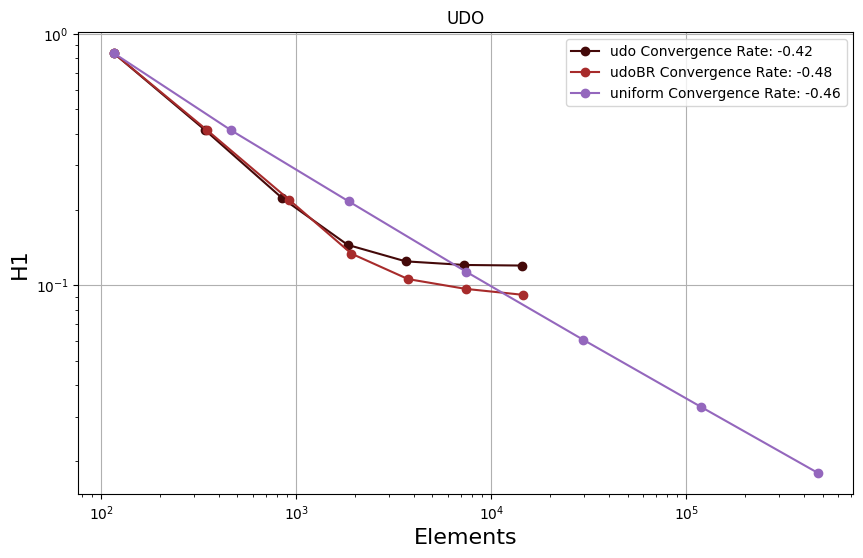

In [62]:
getPlot(Convdf, ['udo', 'udoBR', 'uniform'] , 'Elements', 'H1', 'UDO', plottype='loglog', methodcolors=methodcolors, legend = True)

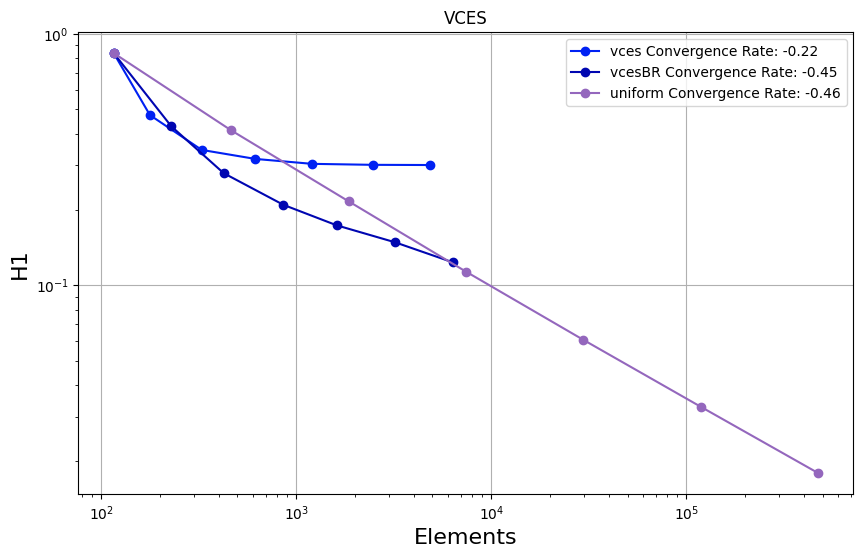

In [63]:
getPlot(Convdf, ['vces', 'vcesBR', 'uniform'] , 'Elements', 'H1', 'VCES', plottype='loglog', methodcolors=methodcolors, legend = True)

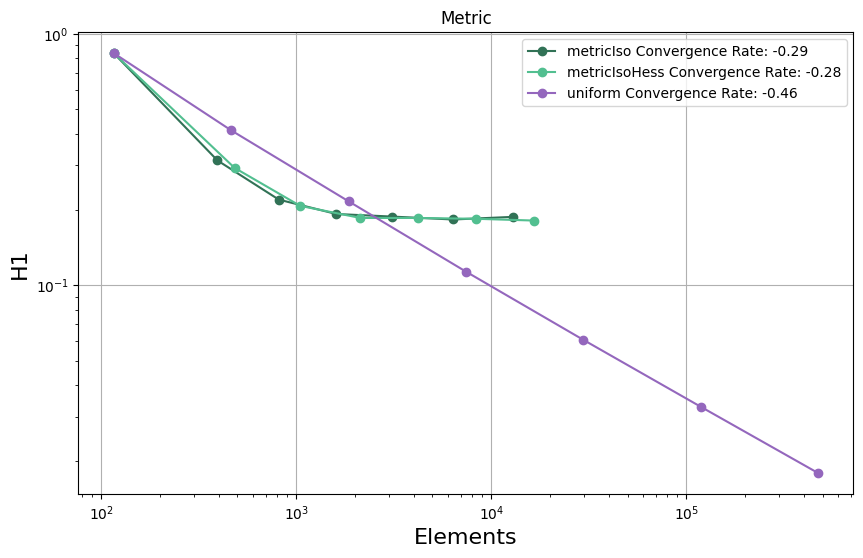

In [77]:
getPlot(Convdf, ['metricIso', 'metricIsoHess', 'uniform'] , 'Elements', 'H1', 'Metric', plottype='loglog', methodcolors=methodcolors, legend = True)
# metric averaging needs to be tuned

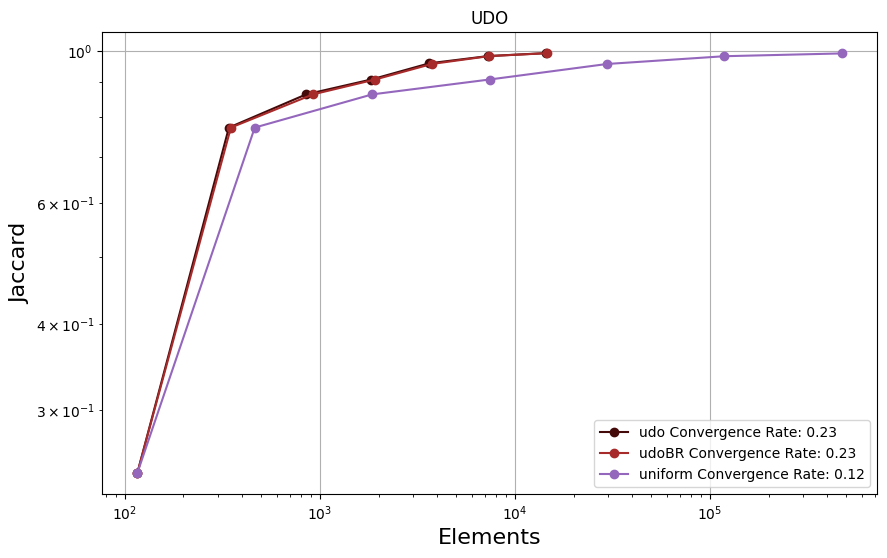

In [70]:
getPlot(Convdf, ['udo', 'udoBR', 'uniform'] , 'Elements', 'Jaccard', 'UDO', plottype='loglog', methodcolors=methodcolors, legend = True)

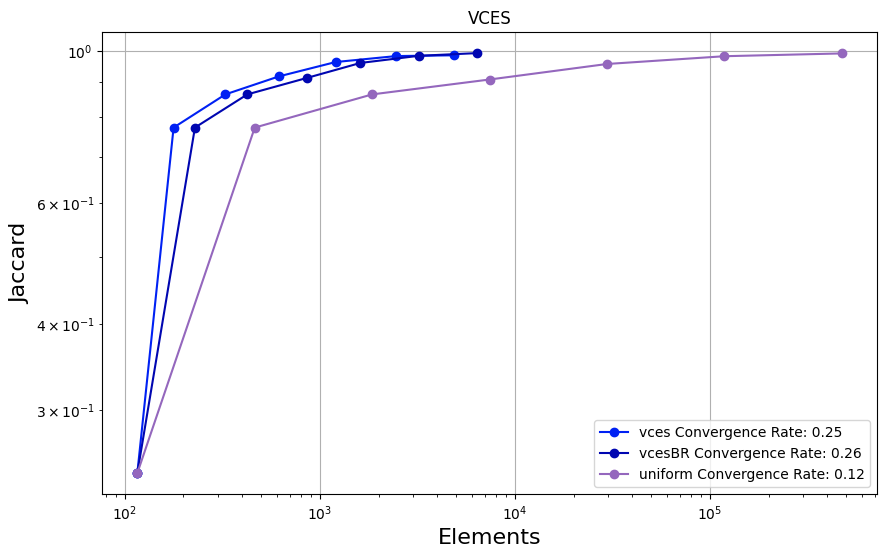

In [71]:
getPlot(Convdf, ['vces', 'vcesBR', 'uniform'] , 'Elements', 'Jaccard', 'VCES', plottype='loglog', methodcolors=methodcolors, legend = True)

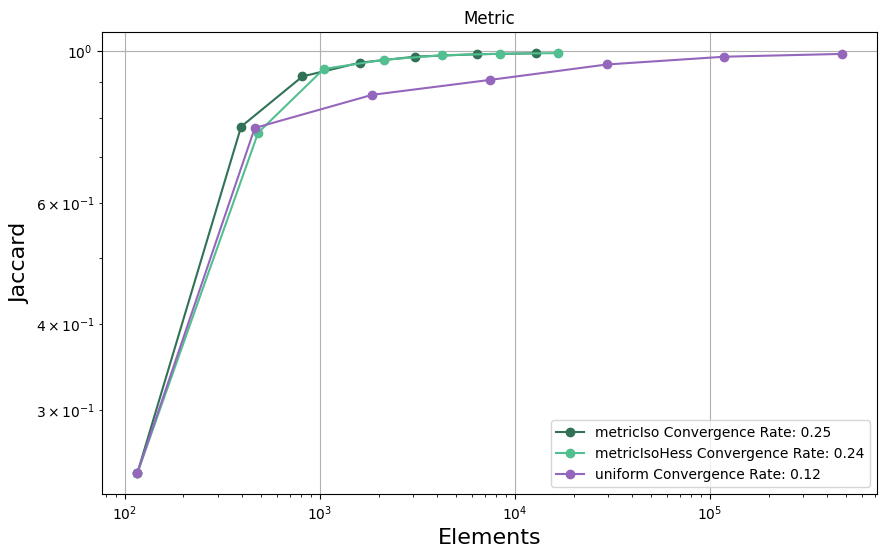

In [72]:
getPlot(Convdf, ['metricIso', 'metricIsoHess', 'uniform'] , 'Elements', 'Jaccard', 'Metric', plottype='loglog', methodcolors=methodcolors, legend = True)

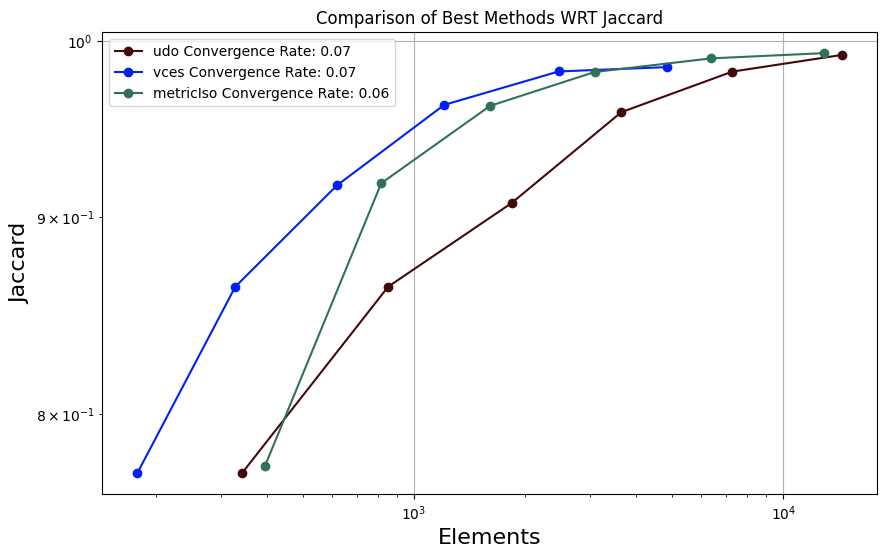

In [78]:
getPlot(Convdf.iloc[1:], ['udo', 'vces', 'metricIso'] , 'Elements', 'Jaccard', 'Comparison of Best Methods WRT Jaccard', plottype='loglog', methodcolors=methodcolors, legend = True)

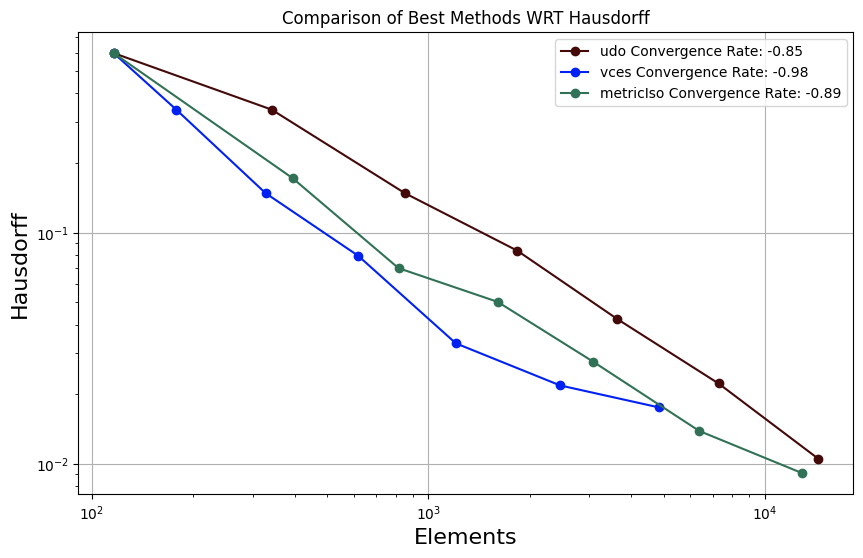

In [85]:
getPlot(Convdf.iloc[0:], ['udo', 'vces', 'metricIso'] , 'Elements', 'Hausdorff', 'Comparison of Best Methods WRT Hausdorff', plottype='loglog', methodcolors=methodcolors, legend = True)

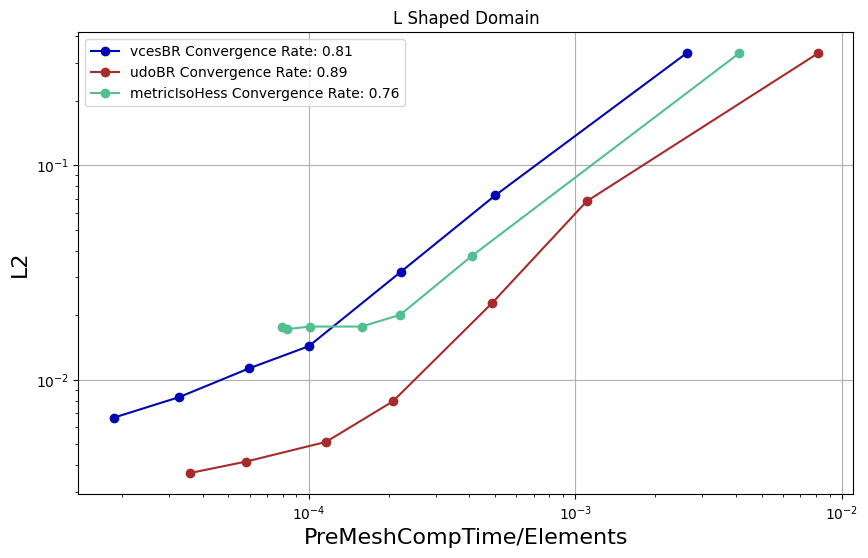

In [104]:
getPlot(Convdf, ['vcesBR', 'udoBR', 'metricIsoHess'] , 'PreMeshCompTime/Elements', 'L2', 'L Shaped Domain', plottype='loglog',methodcolors=methodcolors, legend = True)
# We need to tune the metric averaging

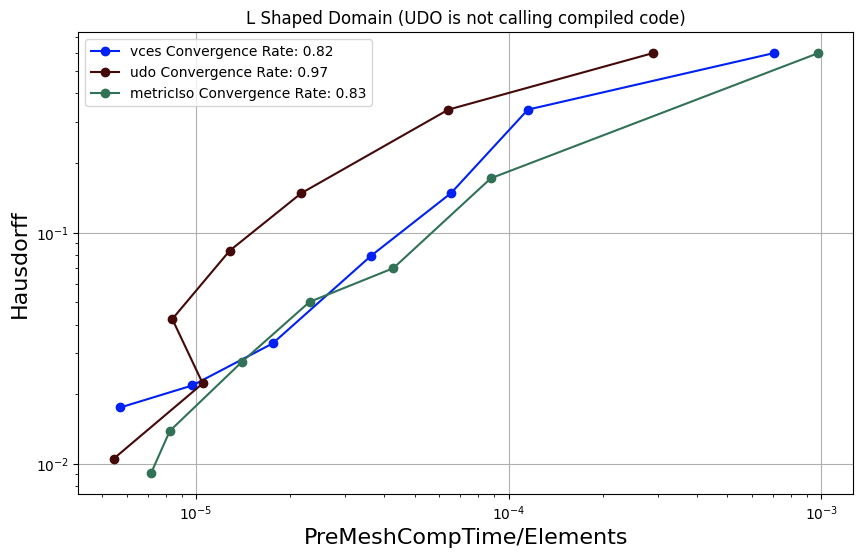

In [93]:
getPlot(Convdf.iloc[0:], ['vces','udo' ,'metricIso'] , 'PreMeshCompTime/Elements', 'Hausdorff', 'L Shaped Domain (UDO is not calling compiled code)', plottype='loglog',methodcolors=methodcolors, legend = True)
# To the left and down is better

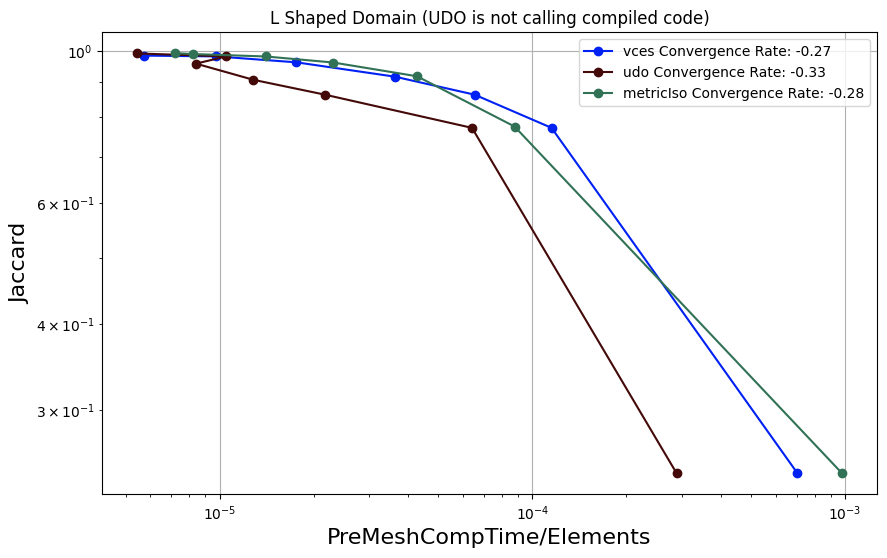

In [96]:
getPlot(Convdf.iloc[0:], ['vces','udo' ,'metricIso'] , 'PreMeshCompTime/Elements', 'Jaccard', 'L Shaped Domain (UDO is not calling compiled code)', plottype='loglog',methodcolors=methodcolors, legend = True)


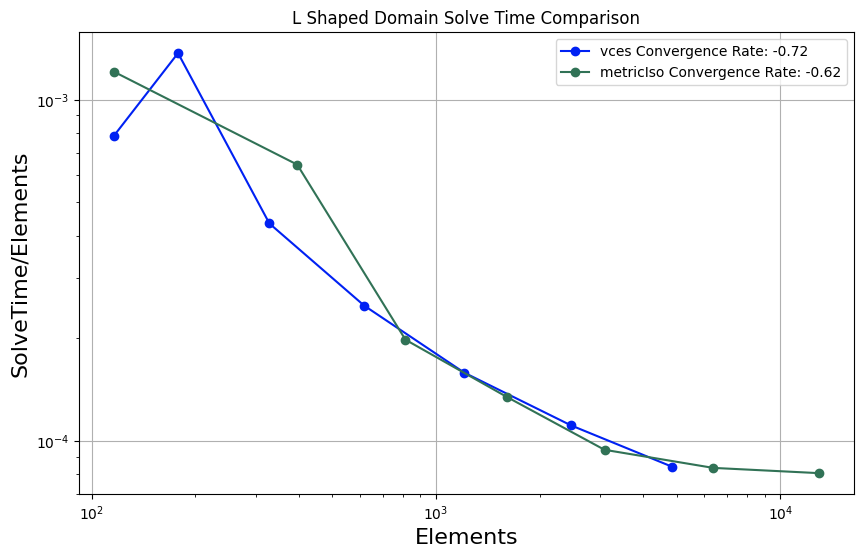

In [103]:
getPlot(Convdf.iloc[0:], ['vces' ,'metricIso'] , 'Elements', 'SolveTime/Elements', 'L Shaped Domain Solve Time Comparison', plottype='loglog',methodcolors=methodcolors, legend = True)
# Grid sequencing should make the solve time better for tag and refine methods?? Likely an issue with cross mesh interpolation?